In [273]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [274]:
csv_files = glob.glob("Sales_Data/*.csv")

In [275]:
all_df = []
for file in csv_files:
    df = pd.read_csv(file)
    all_df.append(df)

In [276]:
df = pd.concat(all_df,  ignore_index= True)

In [277]:
# save all the dataframe to new csv file
df.to_csv('combined_sales.csv', index = False)

## Take a look at the data

In [278]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [279]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [281]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [282]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [284]:
df = df.rename(columns ={'Order ID': 'Order_ID', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date',
       'Purchase Address': 'Purchase_Address'})

In [285]:
df.isna().value_counts()

Order_ID  Product  Quantity_Ordered  Price_Each  Order_Date  Purchase_Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
Name: count, dtype: int64

In [286]:
# drop all nans and reset the index
df = df.dropna(how ='all').reset_index(drop = True)

## Change the dtype for the date to a datetime

In [288]:
df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [289]:
df.shape

(186305, 6)

In [290]:
# identifying merged headers and excluded them from the dataset
df = df[df['Order_Date'] != 'Order Date'] 

## Change the dtype of the Respective Columns

In [291]:
# changing the dateformat of the Order_Date Column
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%y %H:%M')

In [292]:
df['Product'] = df['Product'].astype(str)

In [553]:
df['Order_ID'] = df['Order_ID'].astype(int)

In [554]:
df['Quantity_Ordered'] = df['Quantity_Ordered'].astype(int)

In [555]:
df['Price_Each'] = df['Price_Each'].astype(float)

In [556]:
df['Purchase_Address'] = df['Purchase_Address'].astype(str)

In [557]:
df.dtypes

Order_ID                     int32
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Month                        int32
Month_Name                category
Day                          int32
Year                         int32
Order_Total                float64
City                        object
Time                        object
Hour                         int32
Minute                       int32
dtype: object

## Add additional columns

In [558]:
df['Month']= df['Order_Date'].dt.month

month_name_lambda = lambda x: calendar.month_name[x]

df['Month_Name']= df['Month'].apply(month_name_lambda)

In [559]:
df['Day'] = df['Order_Date'].dt.day

In [560]:
df['Year'] = df['Order_Date'].dt.year

In [561]:
df['Time'] = df['Order_Date'].dt.time

In [562]:
df['Hour'] = df['Order_Date'].dt.hour

In [563]:
df['Minute'] = df['Order_Date'].dt.minute

In [564]:
df['Order_Total'] = (df['Quantity_Ordered']) * (df['Price_Each'])

In [565]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase_Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [566]:
# convert month number to 

df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Month_Name,Day,Year,Order_Total,City,Time,Hour,Minute
69191,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",1,January,1,2019,2.99,Boston (MA),21:01:00,21,1
77043,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001",1,January,15,2019,5.98,Los Angeles (CA),14:21:00,14,21
77042,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035",1,January,21,2019,999.99,Portland (OR),14:31:00,14,31


In [567]:
# Drop month Number
# df.drop('Month', axis = 1, inplace = True)

In [568]:
# What was the best month for sales and how much was earned that month

In [569]:
# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']


# Convert 'Month_Name' to a categorical type with the specified order
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order)

# Sort the DataFrame by 'Month_Name' to ensure the correct order
df = df.sort_values('Month_Name')

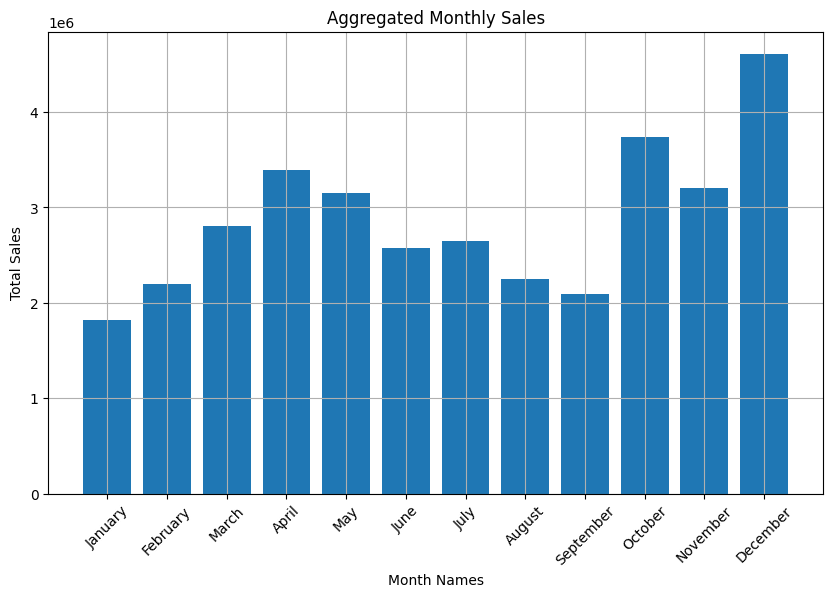

In [570]:
agg_monthly_sales = df.groupby('Month_Name', observed=True)['Order_Total'].sum().reset_index()
plt.figure(figsize = (10,6))
plt.bar(data = agg_monthly_sales, x = 'Month_Name', height = 'Order_Total')
plt.title('Aggregated Monthly Sales')
plt.xlabel('Month Names')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis = 'both')

In [571]:
## What US city had the highest sales?

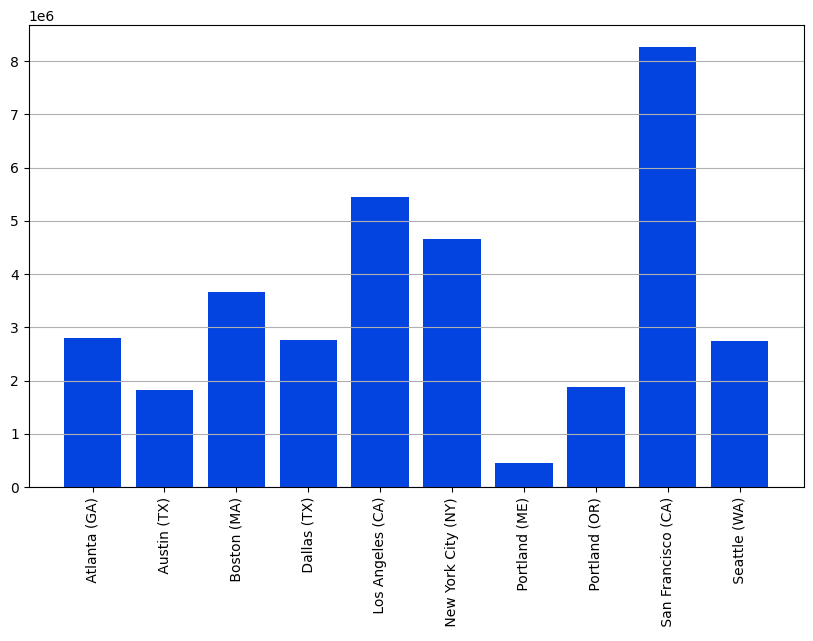

In [572]:
city_sales = df.groupby('City')['Order_Total'].sum().reset_index()
plt.figure(figsize = (10,6))
_info = plt.bar(data = city_sales, x = 'City', height = 'Order_Total', color = 'xkcd:blue' )
plt.xticks(rotation=90)
plt.grid(axis = 'y')
plt.show()

## What time should we display adverts to Maximize the likelihood of customers buying your products
df.head(2)

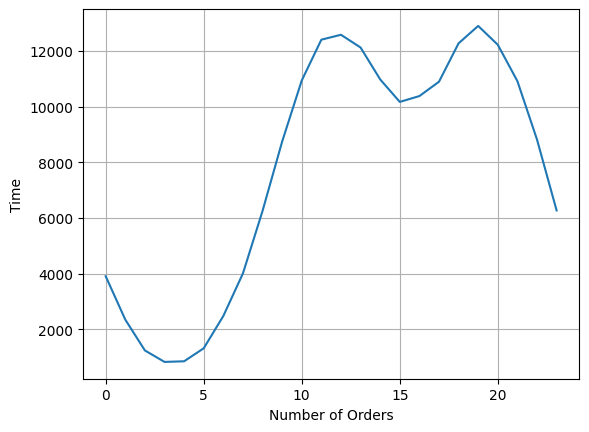

In [573]:
order_rate_hr = df.groupby('Hour').size()

plt.plot(order_rate_hr.index, order_rate_hr.values )
plt.grid(axis = 'both')
plt.xlabel('Number of Orders')
plt.ylabel('Time')
plt.show()

In [574]:
## What products are most sold together

In [575]:
df.shape

(185950, 15)

In [730]:
df.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Month_Name,Day,Year,Order_Total,City,Time,Hour,Minute
69191,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",1,January,1,2019,2.99,Boston (MA),21:01:00,21,1
70565,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",1,January,11,2019,150.00,San Francisco (CA),14:22:00,14,22


In [716]:
df.Order_ID.size

185950

In [717]:
df.Product.size

185950

## What products are most often sold together?

In [772]:
# df.drop('Grouped', axis = 1, inplace = True)

df2 = df[df['Order_ID'].duplicated(keep = False)]
df2['Grouped'] = df2.groupby('Order_ID')['Product'].transform(lambda x: ', '.join(x))

C:\Users\dyolf\AppData\Local\Temp\ipykernel_19580\2856172836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order_ID')['Product'].transform(lambda x: ', '.join(x))


In [775]:
df2 = df2[['Order_ID', 'Grouped']].drop_duplicates()
df2.head(20)

,Order_ID,Grouped
70536,144271,"Lightning Charging Cable, iPhone"
70606,144339,"Wired Headphones, iPhone"
70612,144344,"USB-C Charging Cable, Google Phone"
70662,144394,"Google Phone, Wired Headphones"
70865,144584,"USB-C Charging Cable, Google Phone"
70873,144592,"iPhone, Lightning Charging Cable"
70883,144600,"Lightning Charging Cable, iPhone"
70886,144602,"Wired Headphones, Google Phone"
70831,144551,"Lightning Charging Cable, iPhone"
70824,144545,"AA Batteries (4-pack), AAA Batteries (4-pack)"


In [777]:
# count the pairs
## Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 4)))
for key, value in count.most_common(10):
    print(key, value)
    

('Lightning Charging Cable', ' iPhone', ' Wired Headphones', ' Google Phone') 1
('Lightning Charging Cable', ' iPhone', ' Wired Headphones', ' Apple Airpods Headphones') 1
('Lightning Charging Cable', ' iPhone', ' Google Phone', ' Apple Airpods Headphones') 1
('Lightning Charging Cable', ' Wired Headphones', ' Google Phone', ' Apple Airpods Headphones') 1
(' iPhone', ' Wired Headphones', ' Google Phone', ' Apple Airpods Headphones') 1
('Google Phone', ' Wired Headphones', ' AA Batteries (4-pack)', ' USB-C Charging Cable') 1
('USB-C Charging Cable', ' Bose SoundSport Headphones', ' Wired Headphones', ' Google Phone') 1
('Google Phone', ' USB-C Charging Cable', ' Wired Headphones', ' USB-C Charging Cable') 1
('Google Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones', ' Wired Headphones') 1
('iPhone', ' Lightning Charging Cable', ' USB-C Charging Cable', ' Wired Headphones') 1


In [ ]:
# What product sold the Most and Why do you think it sold the most?

In [801]:
product_group = df.groupby('Product')
quantity_ordered = product_group.count()['Quantity_Ordered']
products = [product for product, df in product_group]

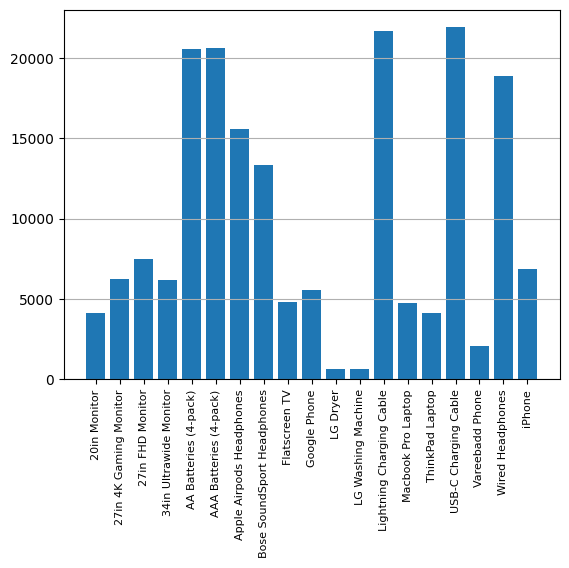

In [808]:
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation=90, size = 8)
plt.grid(axis = 'y')
plt.show()

In [827]:
prices = df.groupby('Product')['Price_Each'].mean()


## Let us overlay the prices of the products with the quantity ordered

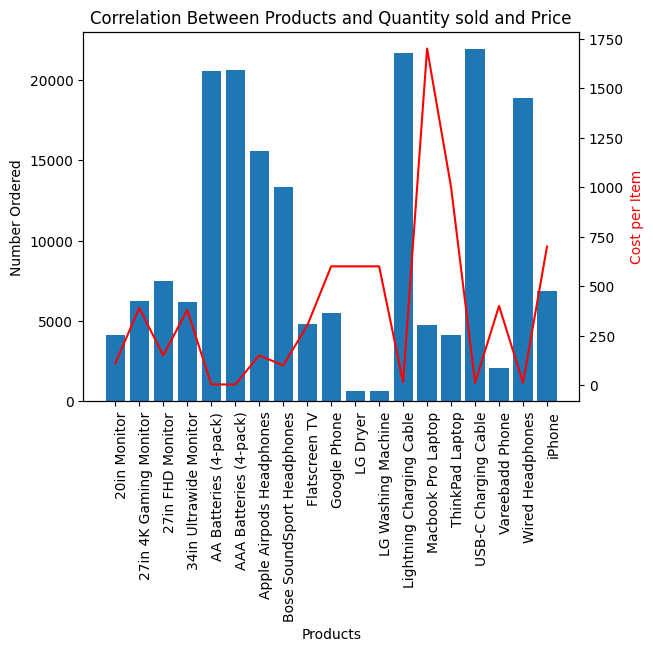

In [847]:
fig, ax1 = plt.subplots()
# Create the title
ax1.set_title('Correlation Between Products and Quantity sold and Price')
# create the first plot
ax1.bar(products, quantity_ordered)
ax1.set_ylabel('Number Ordered', color='black')
ax1.set_xlabel('Products', color='black')

# Create the second y-axis and plot
ax2 = ax1.twinx()
ax2.set_ylabel('Cost per Item', color='r')
ax2.plot(products, prices, 'r-')



# rotate the tick lablel
# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

plt.show()